<a href="https://colab.research.google.com/github/abhaskumarsinha/Corpus2GPT/blob/main/guides/Scaling_Laws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Scaling Laws with Corpus2GPT
- **Name**: ABHAS KUMAR SINHA
- **Date Created**: 12-02-2024
- **Date Modified**: N/A
- **Description**: The following Corpus2GPT optimal parameter estimation for scaling is being demonstrated here using the equations in Chinchilla paper.
$$L(N, D) = \hat E + \dfrac{1}{N^\alpha} + \dfrac{1}{D^\beta}$$

# Installing and importing important libraries
- Keras
- Corpus2GPT
- Adding utilities `copy_file_to_drive('filename')` and `copy_file_from_drive('filename')`

In [ ]:
!pip install git+https://www.github.com/keras-team/keras -q
!git clone https://www.github.com/abhaskumarsinha/Corpus2GPT.git
%cd Corpus2GPT

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
Cloning into 'Corpus2GPT'...
remote: Enumerating objects: 604, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 604 (delta 20), reused 2 (delta 2), pack-reused 565
Receiving objects: 100% (604/604), 188.13 KiB | 6.27 MiB/s, done.
Resolving deltas: 100% (318/318), done.
/content/Corpus2GPT


In [ ]:
import keras
import numpy as np
from models.GPT import build_GPT
from tokenizer.tokenizer import *
from inference.inference import *
from inference.scale_utils import *

In [ ]:
def copy_file_to_drive(file_name):
    import shutil
    try:
        source_path = f"/content/Corpus2GPT/{file_name}"
        destination_folder = '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays'
        destination_path = f"{destination_folder}/{file_name}"
        shutil.copy(source_path, destination_path)
        print(f"File '{file_name}' copied successfully to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")

def copy_file_from_drive(file_name):
    import shutil
    try:
        source_folder = '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays'
        source_path = f"{source_folder}/{file_name}"
        destination_folder = '/content/Corpus2GPT/'
        destination_path = f"{destination_folder}/{file_name}"
        shutil.copy(source_path, destination_path)
        print(f"File '{file_name}' copied successfully from '{source_folder}' to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")


# Setting up Models and tokenizers

In [ ]:
copy_file_from_drive('modified_essays.txt')
copy_file_from_drive('tokenizer_.model')
copy_file_from_drive('tokenizer_.vocab')

File 'modified_essays.txt' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.
File 'tokenizer_.model' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.
File 'tokenizer_.vocab' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.


In [ ]:
tokenizer = SPM_Tokenizer(vocab_model_file='./tokenizer_.model', input_size=256+1)

Success!


In [ ]:
dataset = tokenizer.load_dataset(['./modified_essays.txt'])

In [ ]:
for X, Y in dataset:
    X = np.array(X)
    Y = np.array(Y)

In [8]:
vocab_size = 454+1
input_len = 256

model_configs =  [
    (input_len, vocab_size, 100, 1, 0, 10, 10, 1),
    (input_len, vocab_size, 100, 1, 0, 1, 100, 2),
    (input_len, vocab_size, 100, 1, 0, 100, 1, 2),
    (input_len, vocab_size, 200, 2, 0, 10, 20, 1),
    (input_len, vocab_size, 150, 1, 0, 10, 15, 3),
    (input_len, vocab_size, 300, 1, 0, 30, 10, 1),
]

model_epochs = estimate_optimal_ratios_from_models(model_configs, [1000, 2500, 5000], X[:5000], Y[:5000], 30, 128)

Total Number of Experiments: 18
Train Number: 1
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 484ms/step - loss: 5.9325
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 5.0182
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.6079
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 4.3603
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.2006
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 4.0809
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.9810
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 3.9102
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.8611
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 3.8128
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.7742
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 3.7431
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.7201
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.6909
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/st

In [11]:
flops = model_epochs[0]
loss_curve = model_epochs[1]
params = model_epochs[2]

flops_c = normalize_list(flops)

Text(0, 0.5, 'Sparse Crossentropy Loss (with Logits)')

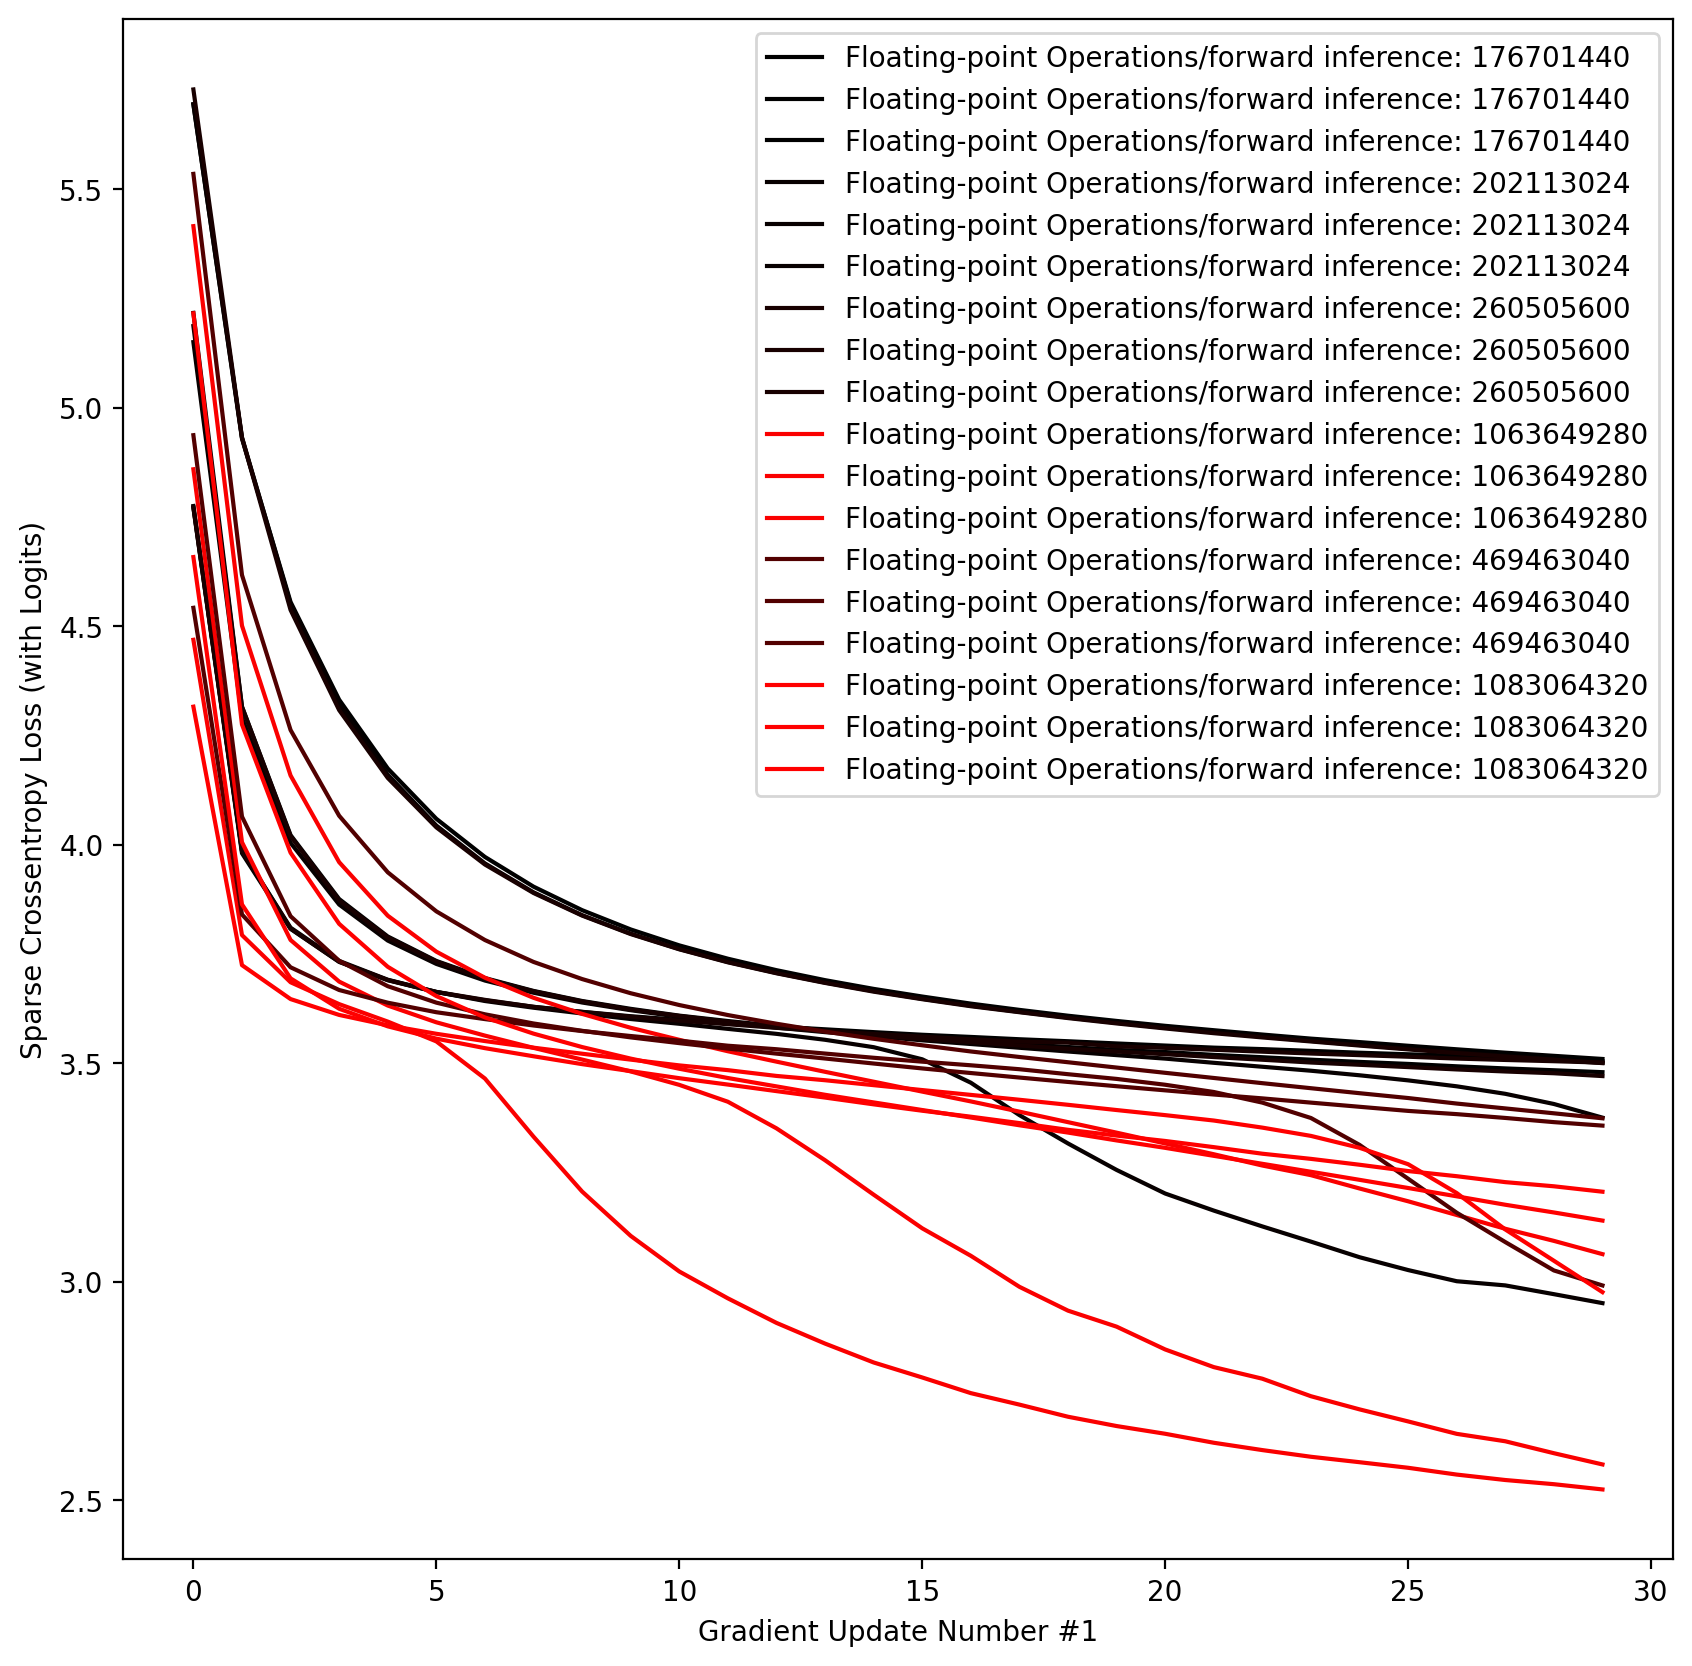

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=200)
for i in range(18):
    plt.plot(loss_curve[i], c=[flops_c[i], 0, 0], label=f'Floating-point Operations/forward inference: {flops[i]}' )
plt.legend()
plt.xlabel('Gradient Update Number #1')
plt.ylabel('Sparse Crossentropy Loss (with Logits)')

In [19]:
flop_list = [20000000*50, 20000000*120, 20000000*240, 20000000*20]

results2 = estimate_optimal_ratios_from_flops(
                                       flop_list,
                                       input_len,
                                       [10, 15],
                                       [2, 5],
                                       3,
                                       3,
                                       vocab_size,
                                       0,
                                       X[:3000],
                                       Y[:3000],
                                       trials_per_flop=2,
                                       batch_size=128)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_20      │ (None, 256, 39)             │          27,729 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_24 (Decoder)                 │ (None, 256, 39)             │          12,597 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 256, 456)            │          18,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,566 (228.77 KB)

 Trainable params: 58,566 (228.77 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 318ms/step - loss: 5.8565
Epoch 2/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 5.0540
Epoch 3/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 4.6402
Epoch 4/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 4.3811
Epoch 5/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 4.2042
Epoch 6/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 4.0814
Epoch 7/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 4.0020
Epoch 8/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 3.9359
Epoch 9/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 3.8943
Epoch 10/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 3.8481
Epoch 11/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.8140
Epoch 12/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 3.7915
Epoch 13/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 3.7715
Epoch 14/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 3.7524
Epoch 15/17
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - l

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_21      │ (None, 256, 52)             │          36,972 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_25 (Decoder)                 │ (None, 256, 52)             │          16,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_26 (Decoder)                 │ (None, 256, 52)             │          16,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 256, 456)            │          24,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,628 (369.64 KB)

 Trainable params: 94,628 (369.64 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - loss: 5.7967
Epoch 2/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 4.8621
Epoch 3/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - loss: 4.4419
Epoch 4/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 4.2024
Epoch 5/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 4.0572
Epoch 6/6
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 3.9684


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_22      │ (None, 256, 48)             │          34,128 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_27 (Decoder)                 │ (None, 256, 48)             │          14,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_28 (Decoder)                 │ (None, 256, 48)             │          14,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 256, 456)            │          22,344 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,080 (332.34 KB)

 Trainable params: 85,080 (332.34 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 5.8315
Epoch 2/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 4.9294
Epoch 3/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 4.5159
Epoch 4/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 4.2742
Epoch 5/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 4.1210
Epoch 6/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 4.0140
Epoch 7/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - loss: 3.9365
Epoch 8/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 3.8785
Epoch 9/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 3.8353
Epoch 10/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 3.7983
Epoch 11/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 3.7726
Epoch 12/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 3.7505
Epoch 13/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 3.7338
Epoch 14/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 3.7105
Epoch 15/18
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/ste

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_23      │ (None, 256, 40)             │          28,440 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_29 (Decoder)                 │ (None, 256, 40)             │          13,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 256, 456)            │          18,696 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,376 (235.84 KB)

 Trainable params: 60,376 (235.84 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - loss: 5.8243
Epoch 2/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 5.0079
Epoch 3/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.6115
Epoch 4/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 4.3696
Epoch 5/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 4.1980
Epoch 6/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 4.0799
Epoch 7/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 3.9969
Epoch 8/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.9356
Epoch 9/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 3.8920
Epoch 10/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.8476
Epoch 11/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 3.8157
Epoch 12/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.7911
Epoch 13/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.7708
Epoch 14/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 3.7509
Epoch 15/42
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 3

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_24      │ (None, 256, 28)             │          19,908 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_30 (Decoder)                 │ (None, 256, 28)             │           4,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 256, 456)            │          13,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,116 (148.89 KB)

 Trainable params: 38,116 (148.89 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - loss: 5.9562
Epoch 2/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 5.3002
Epoch 3/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.8881
Epoch 4/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 4.6257
Epoch 5/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 4.4401
Epoch 6/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 4.2992
Epoch 7/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.1965
Epoch 8/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 4.1144
Epoch 9/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 4.0527
Epoch 10/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 4.0011
Epoch 11/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 3.9573
Epoch 12/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 3.9206
Epoch 13/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 3.8920
Epoch 14/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.8670
Epoch 15/127
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 1

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_25      │ (None, 256, 26)             │          18,486 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_31 (Decoder)                 │ (None, 256, 26)             │           4,316 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 256, 456)            │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,114 (137.16 KB)

 Trainable params: 35,114 (137.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 5.9452
Epoch 2/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 5.3376
Epoch 3/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.9509
Epoch 4/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 4.6968
Epoch 5/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 4.5066
Epoch 6/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.3642
Epoch 7/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 4.2502
Epoch 8/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 4.1642
Epoch 9/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 4.0904
Epoch 10/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 4.0411
Epoch 11/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.9947
Epoch 12/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 3.9568
Epoch 13/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 3.9215
Epoch 14/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 3.8998
Epoch 15/139
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_26      │ (None, 256, 48)             │          34,128 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_32 (Decoder)                 │ (None, 256, 48)             │          14,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_33 (Decoder)                 │ (None, 256, 48)             │          14,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 256, 456)            │          22,344 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,080 (332.34 KB)

 Trainable params: 85,080 (332.34 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 347ms/step - loss: 5.8163
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 4.9194
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - loss: 4.5039


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ token_and_position_embedding_27      │ (None, 256, 26)             │          18,486 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_34 (Decoder)                 │ (None, 256, 26)             │           5,694 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 256, 456)            │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,492 (142.55 KB)

 Trainable params: 36,492 (142.55 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 5.9144
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 5.3016
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 4.9463
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 4.7083
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 4.5257
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.3827
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 4.2641
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 4.1695
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.1051
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 4.0451


In [21]:
loss_history = results2[0]
flops = results2[1]
params = results2[2]

flops_ = normalize_list(flops)
params_ = normalize_list(params)

Text(0, 0.5, 'Sparse Crossentropy Loss (with Logits)')

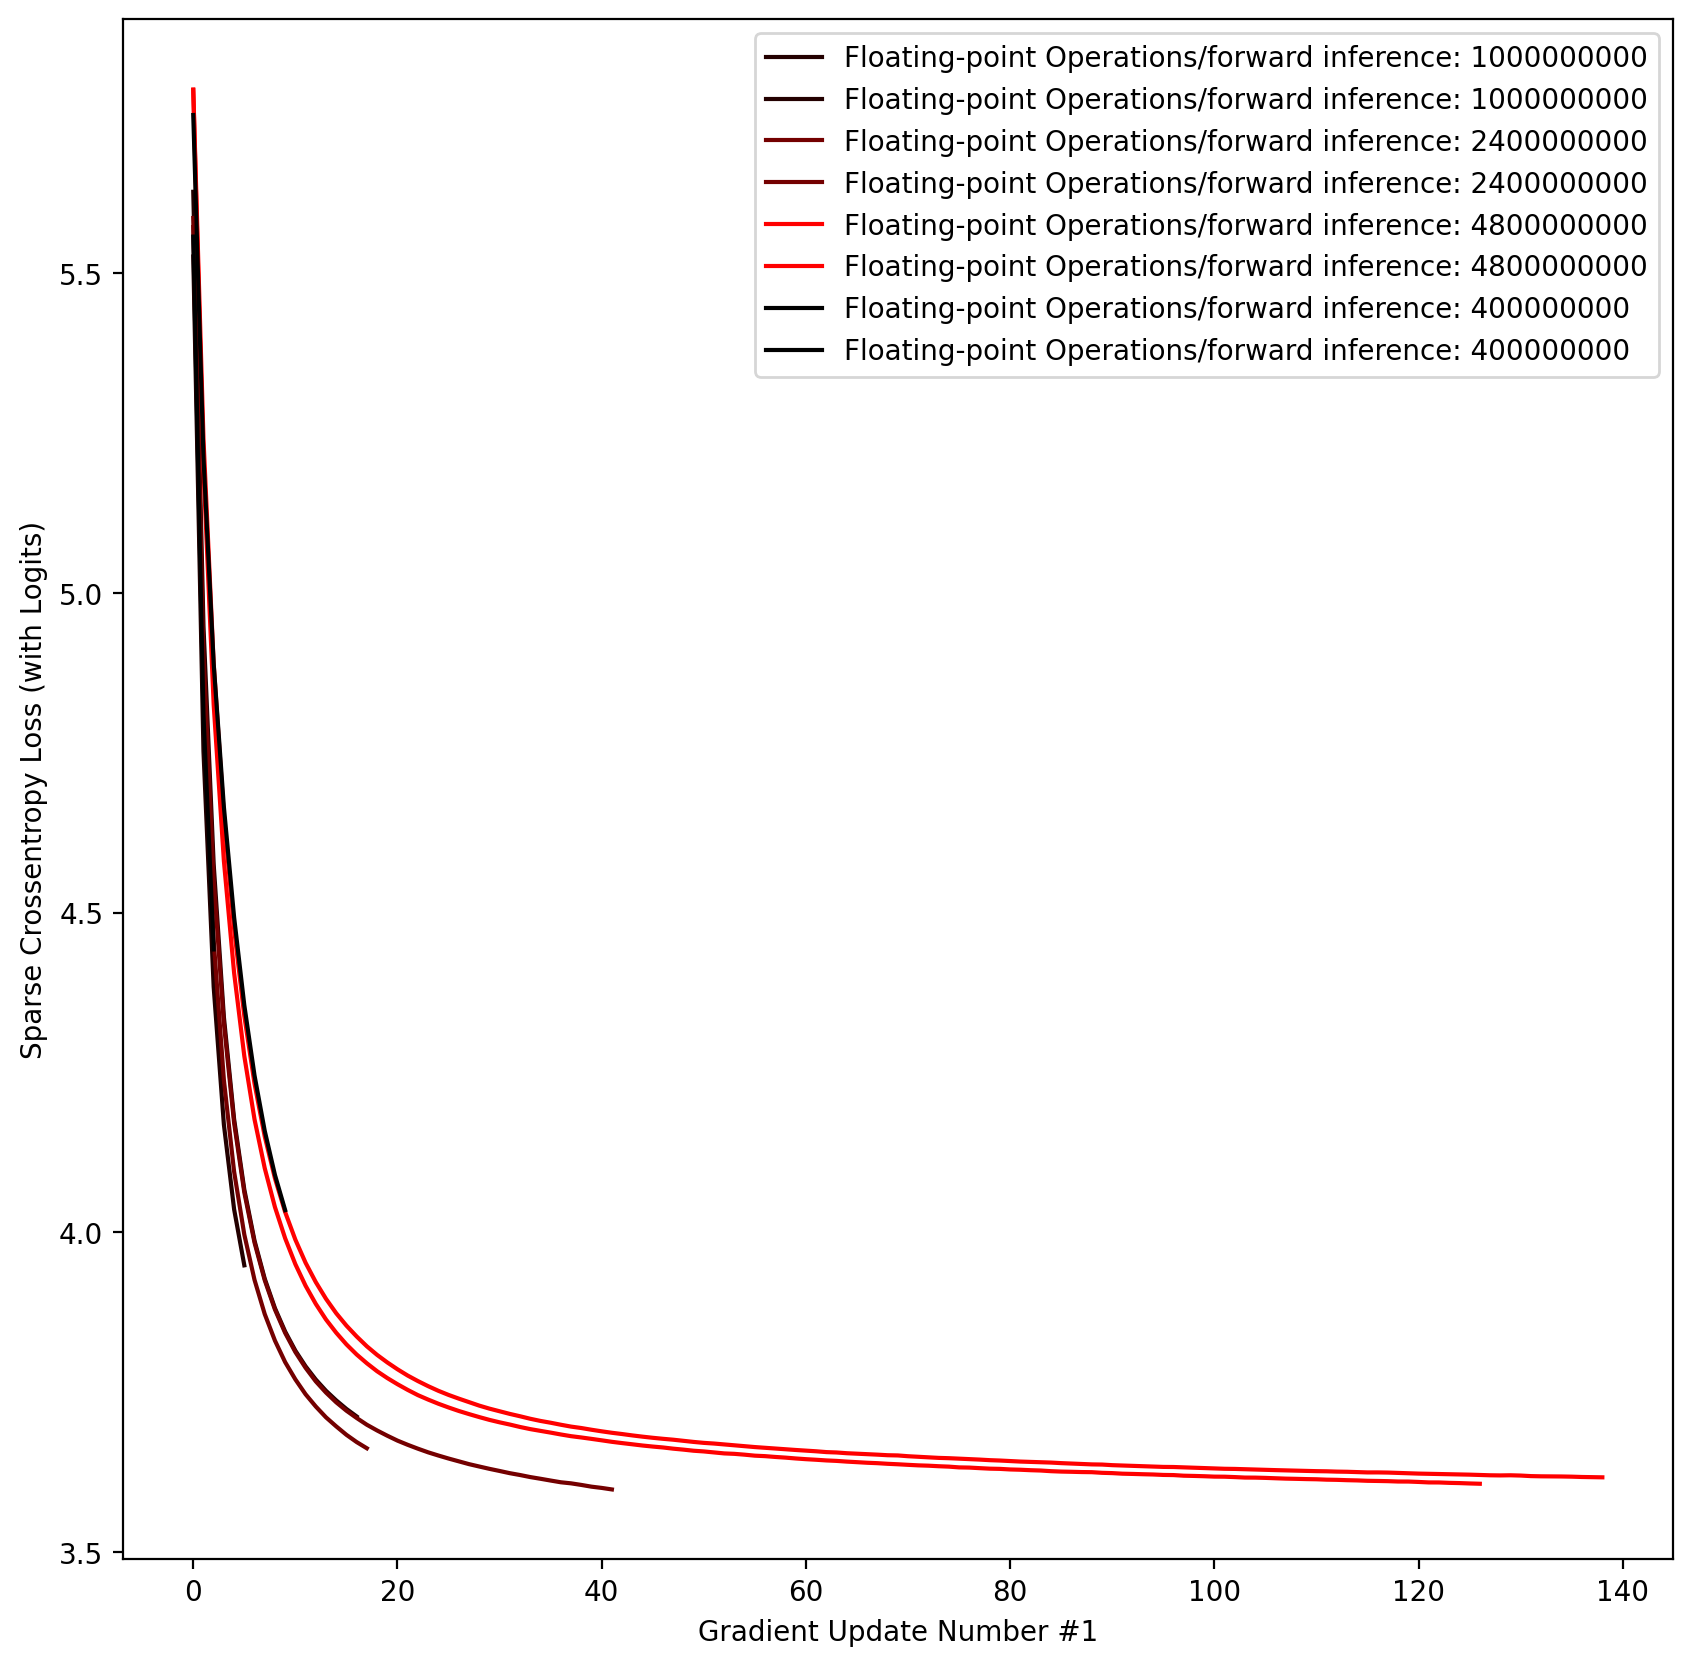

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=200)
for i in range(8):
    plt.plot(loss_history[i], c=[flops_[i], 0, 0], label=f'Floating-point Operations/forward inference: {flops[i]}' )
plt.legend()
plt.xlabel('Gradient Update Number #1')
plt.ylabel('Sparse Crossentropy Loss (with Logits)')

Text(0, 0.5, 'Sparse Crossentropy Loss (with Logits)')

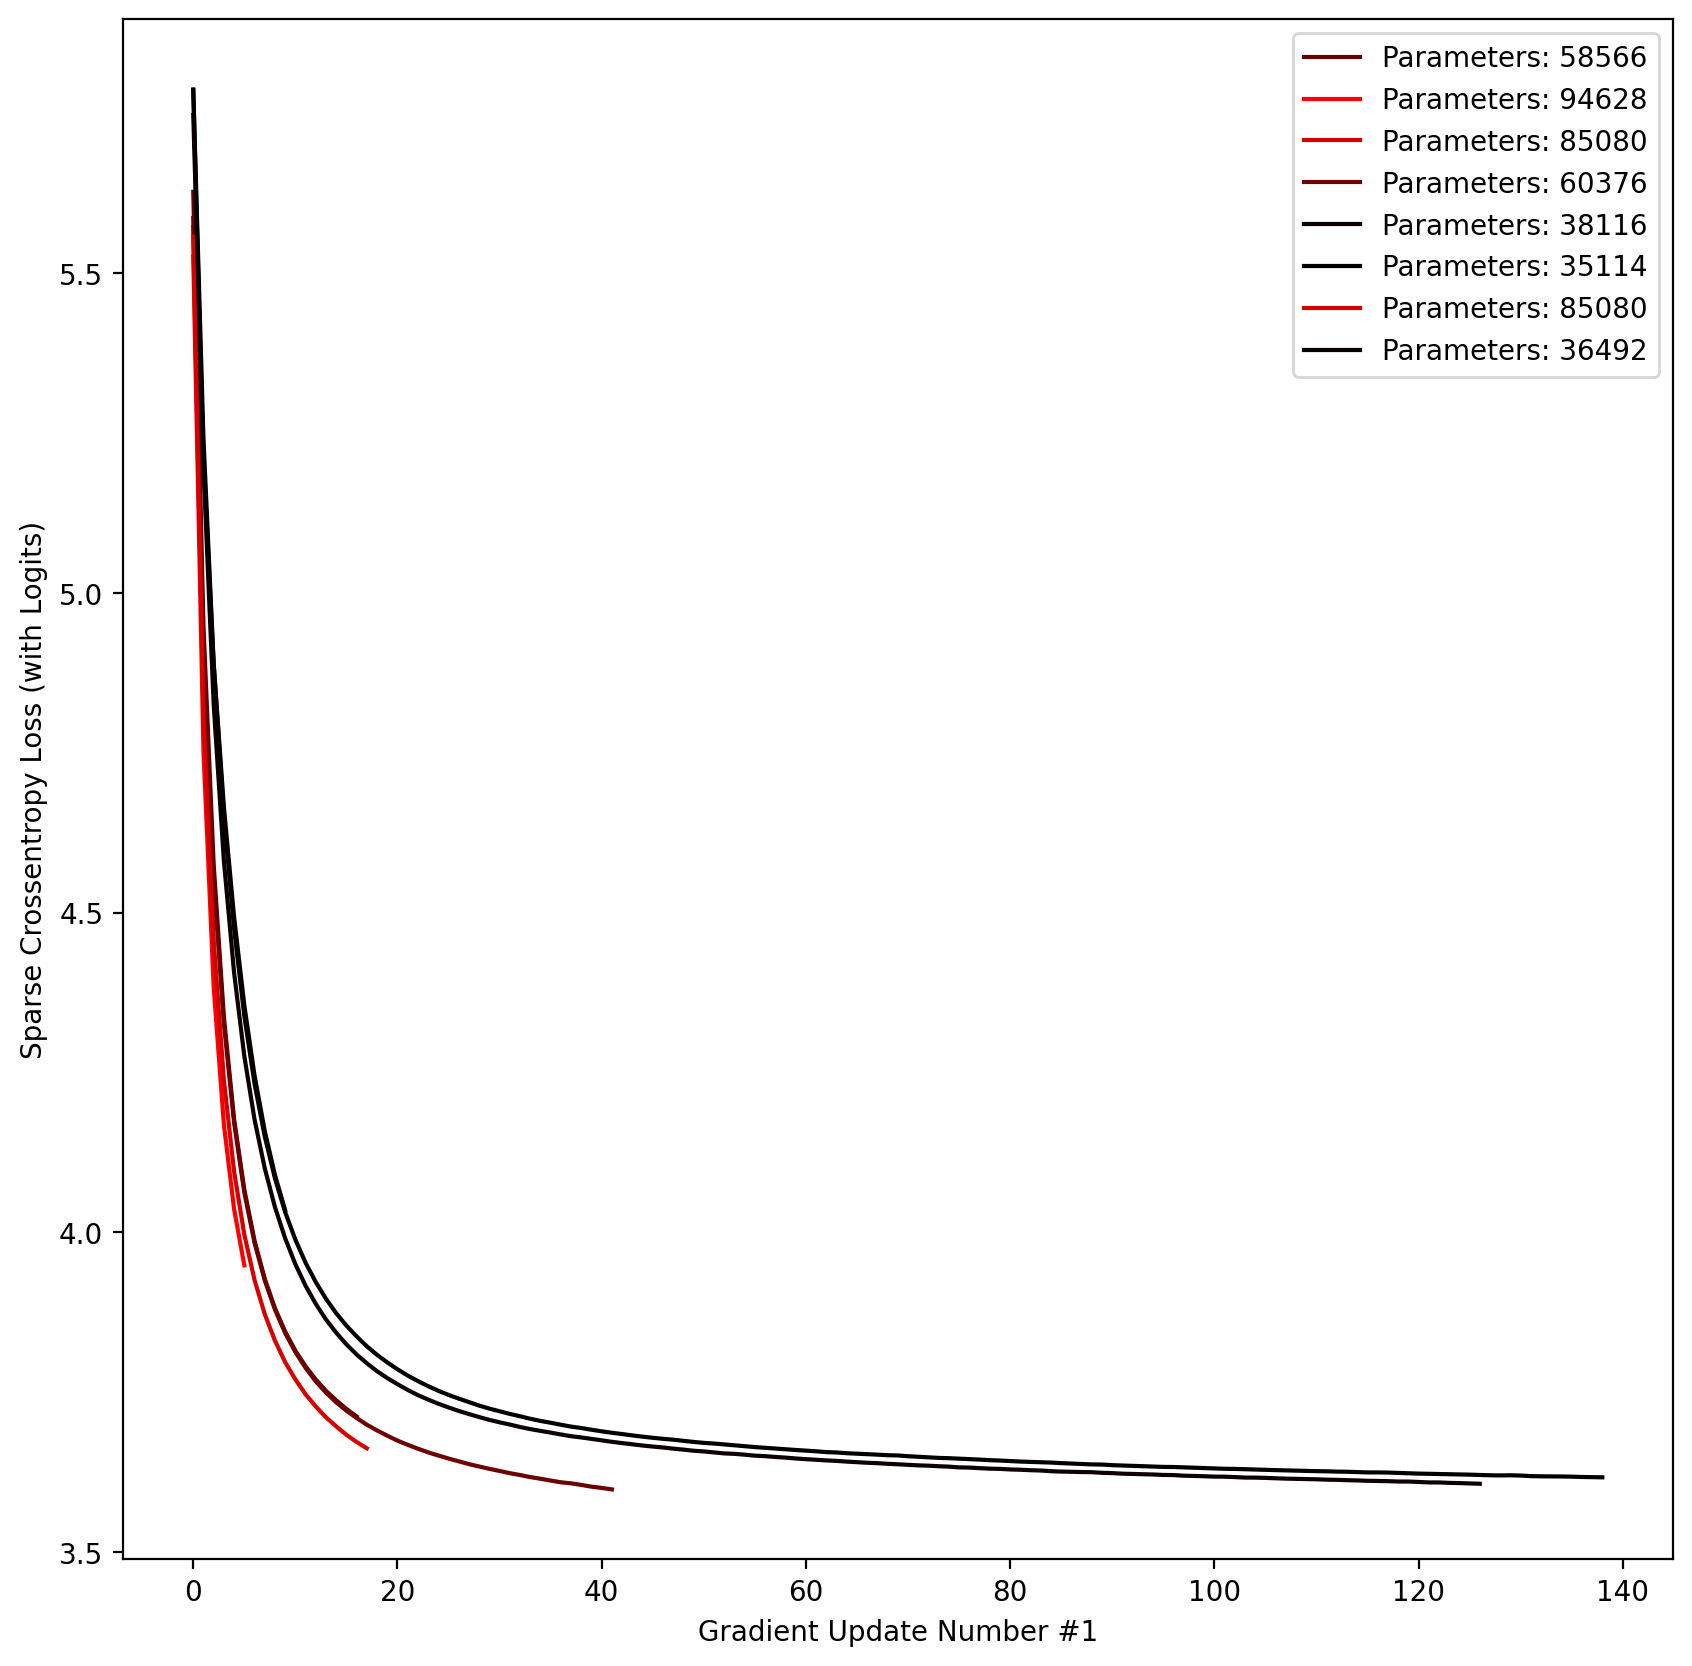

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=200)
for i in range(8):
    plt.plot(loss_history[i], c=[params_[i], 0, 0], label=f'Parameters: {params[i]}' )
plt.legend()
plt.xlabel('Gradient Update Number #1')
plt.ylabel('Sparse Crossentropy Loss (with Logits)')